In [2]:
#평가 스케일
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y), 
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

from sklearn import metrics
rmsle_scorer = metrics.make_scorer(rmsle)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 전처리

In [3]:
import pandas as pd
import numpy as np

In [ ]:
!pip install --upgrade numpy

In [4]:
df = pd.read_csv("/content/drive/Shareddrives/21-1 대전시 공모전/analysis/bf_covid_train.csv")
df2 = pd.read_csv("/content/drive/Shareddrives/21-1 대전시 공모전/analysis/bf_covid_test.csv")

In [5]:
bf_train = df.drop(['clustering', 'Unnamed: 0'], axis=1)
bf_test = df2.drop(['clustering', 'Unnamed: 0'], axis=1)

모델링

In [6]:
# X : features, y: target variable
X_train=  bf_train[bf_train.columns.difference(["이용자 수"])]
X_test= bf_test[bf_test.columns.difference(["이용자 수"])]
y_train= bf_train["이용자 수"]
y_test= bf_test['이용자 수']

# decision tree

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.predict(X_test)

array([ 6465, 14206, 14206, ...,  4602,  8381,  8237])

In [ ]:
from sklearn.model_selection import GridSearchCV
rmsle_scorer = metrics.make_scorer(rmsle,greater_is_better=False)
param_dict = {"criterion" : ['gini','entropy'],"max_depth": range(1,10), "min_samples_split": range(1,10), "min_samples_leaf": range(1,10)}
grid_dt = GridSearchCV(dt,param_dict, scoring=rmsle_scorer, cv=2 , verbose=1, n_jobs=-1)
grid_dt.fit(X_train, y_train)

Fitting 2 folds for each of 1458 candidates, totalling 2916 fits


/Users/yoonjeong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"
/Users/yoonjeong/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/yoonjeong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [ nan -inf -inf ... -inf -inf -inf]
  warnings.warn(
/Users/yoonjeong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:925: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10)},
             scoring=make_scorer(rmsle, greater_is_better=False), verbose=1)

In [ ]:
grid_dt.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
pred = grid_dt.predict(X_train)
print('RMSLE Value For Decision Tree_bf_group0: %.4f' % (rmsle(pred,y_train,False)))
print("\n")


y_pred = grid_dt.predict(X_test)
print('RMSLE Value For Decision Tree_bf_group0 : %.4f' % (rmsle(y_pred,y_test,False)))
print("\n")

RMSLE Value For Decision Tree_bf_group0: 0.8926


RMSLE Value For Decision Tree_bf_group0 : 0.9048




In [ ]:
import pandas as pd
dt1 = grid_dt.best_estimator_.fit(X_train, y_train)
feature_imp = pd.DataFrame(dt1.feature_importances_,index=X_train.columns, columns=['importance']).sort_values('importance',ascending=False)
feature_imp

,importance
갑천,1.0
갈마,0.0
중구청,0.0
월드컵경기장,0.0
월평,0.0
유성온천,0.0
은행,0.0
인구수,0.0
일우량,0.0
장마기간,0.0


시각화

In [ ]:
dt1 = grid_dt.best_estimator_.fit(X_train, y_train)

In [ ]:
!pip install graphviz
!pip install pydotplus

In [ ]:
tree.export_graphviz(dt1)

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[36] <= 0.5\\ngini = 1.0\\nsamples = 2920\\nvalue = [1, 1, 1 ... 1, 1, 1]"] ;\n1 [label="gini = 0.999\\nsamples = 2190\\nvalue = [1, 0, 1 ... 1, 1, 1]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.998\\nsamples = 730\\nvalue = [0, 1, 0 ... 0, 0, 0]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n}'

In [ ]:
y_train = pd.DataFrame(y_train)
print(X_train.columns, y_train.columns)

Index(['갈마', '갑천', '구암', '날짜', '노령화지수', '노은', '대동', '대전', '대형마트_b', '도서관_b',
       '반석', '백화점_b', '버스정류장', '버스터미널_b', '병원_b', '샌드위치', '서대전네거리', '술집 ',
       '스타벅스', '시청', '신흥', '영화관_b', '오룡', '올리브영', '용문', '월드컵경기장', '월평', '유성온천',
       '은행', '인구수', '일우량', '장마기간', '적설량', '정부청사', '중구청', '중앙로', '지족', '최고기온',
       '최저기온', '출구', '탄방', '판암', '학교', '학기여부', '현충원', '휴일'],
      dtype='object') Index(['이용자 수'], dtype='object')


In [ ]:
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dt1 , max_depth=3, feature_names=X_train.columns
                          , class_names=y_train.columns, filled=True, proportion=True)
display(graphviz.Source(dot_data))

# random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.predict(X_test)

In [1]:
from sklearn.model_selection import GridSearchCV
rmsle_scorer = metrics.make_scorer(rmsle,greater_is_better=False)
param_dict = {"criterion" : ['gini','entropy'],"max_depth": range(1,10)}
grid_rf = GridSearchCV(rf,param_dict, scoring=rmsle_scorer, cv=2 , verbose=1, n_jobs=-1)
grid_rf.fit(X_train, y_train)

NameError: ignored

In [ ]:
pred = grid_rf.predict(X_train)
print('RMSLE Value For Random Forest_bf_group0: %.4f' % (rmsle(pred,y_train,False)))
print("\n")


y_pred = grid_rf.predict(X_test)
print('RMSLE Value For Random Forest_bf_group0 : %.4f' % (rmsle(y_pred,y_test,False)))
print("\n")

RMSLE Value For Random Forest_bf_group0: 0.3848


RMSLE Value For Random Forest_bf_group0 : 0.3866




In [ ]:
import pandas as pd
rf1 = grid_rf.best_estimator_.fit(X_train, y_train)
feature_imp = pd.DataFrame(rf1.feature_importances_,index=X_train.columns, columns=['importance']).sort_values('importance',ascending=False)
feature_imp

,importance
최저기온,0.13
날짜,0.11
샌드위치,0.10
술집,0.09
학교,0.08
출구,0.07
일우량,0.06
최고기온,0.06
지족,0.05
적설량,0.04


# decision tree

In [ ]:
from sklearn import tree
model_1 = tree.DecisionTreeClassifier(max_depth=500, random_state= 42)
model_1 = model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

KeyboardInterrupt: 

KeyboardInterrupt: 

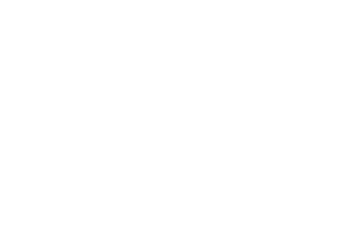

In [ ]:
tree.plot_tree(model_1)

시각화

In [ ]:
!pip install graphviz
!pip install pydotplus

     |████████████████████████████████| 278 kB 1.3 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=ddb35245cc52fd052404c628ff18b97f3d5dea20caef3a691ca51a1ae75b85d7
  Stored in directory: /Users/yoonjeong/Library/Caches/pip/wheels/fe/cd/78/a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
dot_data = tree.export_graphviz(model_1, out_file= dot_data, feature_names=X_train.feature_names, lass_names=X_train.target_names, filled=True, rounded=True,
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

ModuleNotFoundError: No module named 'sklearn.externals.six'

or

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(model_1, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("bf_train") 

dot_data = tree.export_graphviz(model_1, out_file=dot_data, feature_names=X_train.feature_names, lass_names=X_train.target_names, filled=True, rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tpdf', '-O', 'bf_train'], make sure the Graphviz executables are on your systems' PATH

In [ ]:
feature_imp = model_1.feature_importances_

print('{}'.format(feature_imp))

[2.23908949e-01 1.24548237e-04 1.12492252e-04 7.05773345e-04
 2.16015766e-01 2.08334756e-03 0.00000000e+00 1.34927257e-04
 0.00000000e+00 1.03061354e-03 3.22827678e-04 0.00000000e+00
 6.40280656e-04 2.35356173e-03 8.10641882e-04 5.34613873e-04
 4.61498138e-04 3.73644712e-04 1.28063976e-03 1.19216987e-03
 2.62440929e-04 9.53342418e-05 3.37318143e-04 4.80924408e-04
 5.74899989e-04 6.22741187e-05 6.85015305e-04 0.00000000e+00
 0.00000000e+00 1.90899117e-03 1.44372165e-03 7.28187927e-02
 9.75581946e-03 1.10397243e-02 6.22741187e-05 0.00000000e+00
 1.24548237e-04 6.22741187e-05 2.15795450e-01 2.12302452e-01
 1.69826153e-03 1.24548237e-04 0.00000000e+00 1.65095452e-03
 1.49377569e-02 1.02207470e-03 6.67854092e-04]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n_feature = bf_train.data.shape[1]
idx = np.arange(n_feature)

plt.barh(idx, feature_imp, align='center')
plt.yticks(idx, model_1.feature_names)
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)

plt.show()

AttributeError: ignored

optimizing & 시각화

In [ ]:
model_1 = DecisionTreeClassifier(criterion="entropy", max_depth=3)
model_1 = model_1.fit(X_train,y_train)

y_pred = model_1.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
import pydotplus
dot_data = tree.export_graphviz(model_1, out_file=dot_data, feature_names=train.feature_names, lass_names=train.target_names, filled=True, rounded=True,
                                special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

# random forest

일단 돌려보기

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

parameter tuning

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf = RandomForestClassifier(random_state=42, n_estimators=4)
clf.fit(X_train, y_train)

y_pred= clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
model_param_grid = {'n_estimators' : [2,3,4]} 
model_grid = GridSearchCV(model_2, param_grid = model_param_grid, scoring="accuracy",n_jobs=-1,verbose=1)

model_grid.fit(X_train, y_train)

cv=KFold(n_splits=6, random_state=1)
gcv=GridSearchCV(model_2, param_grid=model_param_grid, cv=cv, scoring='f1', n_jobs=-1)

gcv.fit(X_train.values,y_train.values)
print('final params', gcv.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/Users/yoonjeong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

fitting

In [ ]:
model_2 = RandomForestClassifier(n_estimators= /hyperparameter/, random_state=40, n_jobs=-1)
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))